In [236]:
import pandas as pd
import numpy as np
import glob # to find all files in folder
from datetime import datetime
from datetime import date, time
from dateutil.parser import parse
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_context('notebook')
pd.options.mode.chained_assignment = None  # default='warn'

In [237]:
from IPython.core.display import HTML
HTML(filename='Data/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


In [238]:
original_data = pd.read_excel('Data/titanic.xls')
original_data['total'] = 1 # add a colon only consisting of 1s to make couting easier
original_data.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,total
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1


Women and children first?

1. Describe each attribute, both with basic statistics and plots. State clearly your assumptions and discuss your findings.
2. -Use the `groupby` method to calculate the proportion of passengers that survived by sex.-
3. Calculate the same proportion, but by class and sex.
4. Create age categories: children (under 14 years), adolescents (14-20), adult (21-64), and senior(65+), and calculate survival proportions by age category, class and sex.

## 1. Describe each attribute, both with basic statistics and plots. State clearly your assumptions and discuss your findings.

### pclass
the class a person belongs to

In [239]:
pclass = original_data['pclass']
pclass.unique()

array([1, 2, 3])

there are 3 different classes

In [240]:
for c in pclass.unique():
    print('nbr in class '+str(c)+': '+str(len(pclass[pclass == c])))

nbr in class 1: 323
nbr in class 2: 277
nbr in class 3: 709


most are in class 3, but surprisingly class 1 has more passagengers than class 2

### survived
States if the passenger survived the accident

In [241]:
surv = original_data['survived']
surv.unique() # to make sure there are only 1 and 0

array([1, 0])

In [242]:
#how many survived?
surv.sum()

500

In [243]:
#how many died?
len(surv[surv == 0])

809

most died :( 

In [244]:
100/len(surv.values) * surv.sum()

38.19709702062643

only 38% survived

### name
the name of the passanger

In [245]:
name = original_data['name']
len(name.unique()) == len(name.values) 

False

apparently there are some with the same name

In [246]:
len(name.values) - len(name.unique())

2

In [247]:
#lets find them
original_data[name.isin(name[name.duplicated()].values)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,total
725,3,1,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q,13,NaN,Ireland,1
726,3,0,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,NaN,NaN,Ireland,1
924,3,0,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN,70.0,NaN,1
925,3,0,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S,NaN,NaN,NaN,1


### sex
the sex of the passenger

In [248]:
sex = original_data['sex']
sex.unique()

array(['female', 'male'], dtype=object)

In [249]:
nbr_males = len(sex[sex == 'male'])

In [250]:
nbr_females= len(sex[sex == 'female'])

In [251]:
100/len(sex) * nbr_males

64.40030557677616

64.4% are male

### age
How old the passenger is

In [252]:
age = original_data['age']
age.unique()

array([ 29.    ,   0.9167,   2.    ,  30.    ,  25.    ,  48.    ,
        63.    ,  39.    ,  53.    ,  71.    ,  47.    ,  18.    ,
        24.    ,  26.    ,  80.    ,      nan,  50.    ,  32.    ,
        36.    ,  37.    ,  42.    ,  19.    ,  35.    ,  28.    ,
        45.    ,  40.    ,  58.    ,  22.    ,  41.    ,  44.    ,
        59.    ,  60.    ,  33.    ,  17.    ,  11.    ,  14.    ,
        49.    ,  76.    ,  46.    ,  27.    ,  64.    ,  55.    ,
        70.    ,  38.    ,  51.    ,  31.    ,   4.    ,  54.    ,
        23.    ,  43.    ,  52.    ,  16.    ,  32.5   ,  21.    ,
        15.    ,  65.    ,  28.5   ,  45.5   ,  56.    ,  13.    ,
        61.    ,  34.    ,   6.    ,  57.    ,  62.    ,  67.    ,
         1.    ,  12.    ,  20.    ,   0.8333,   8.    ,   0.6667,
         7.    ,   3.    ,  36.5   ,  18.5   ,   5.    ,  66.    ,
         9.    ,   0.75  ,  70.5   ,  22.5   ,   0.3333,   0.1667,
        40.5   ,  10.    ,  23.5   ,  34.5   ,  20.5   ,  30.5

There are NaN values! But also floating point values, which is somewhat unusual

In [253]:
age.min() # a baby?

0.16669999999999999

In [254]:
age.max()

80.0

In [255]:
age.mean()

29.8811345124283

Age distribution in a boxplot:

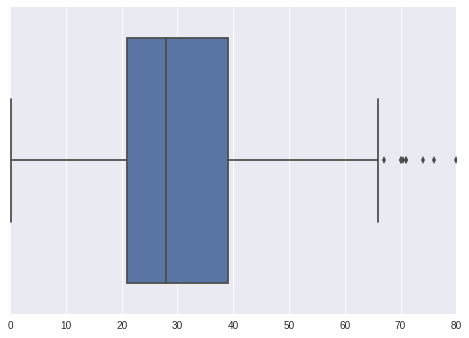

In [256]:
sns.boxplot(age.dropna().values)

And the distribution of age plotted:

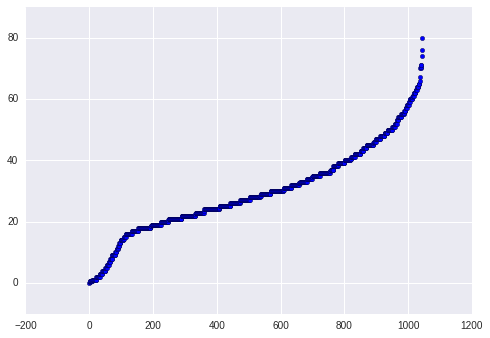

In [257]:
plt.scatter(age.index, age.sort_values())

### sibsp
The number of siblings or spouses on the ship

In [258]:
sipsp = original_data['sibsp']
sipsp.unique()

array([0, 1, 2, 3, 4, 5, 8])

In [259]:
sipsp.mean()

0.4988540870893812

Plot histogram: Almost all traveled without siblings or spouses. there is apparently one family that traveled together (8 siblings are on board)

(array([ 891.,  319.,   42.,   20.,    0.,   22.,    6.,    0.,    0.,    9.]),
 array([ 0. ,  0.8,  1.6,  2.4,  3.2,  4. ,  4.8,  5.6,  6.4,  7.2,  8. ]),
 <a list of 10 Patch objects>)

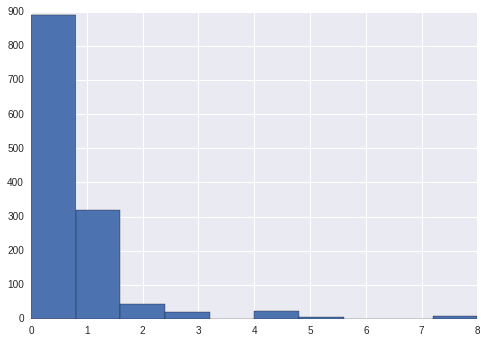

In [260]:
plt.hist(sipsp)

### parch
The number of parents or children on the ship

In [261]:
parch = original_data['parch']
parch.unique()

array([0, 2, 1, 4, 3, 5, 6, 9])

In [262]:
parch.mean()

0.3850267379679144

Histogram: Again almost noone traveled with their kids. The one big family is again seen here.

(array([ 1002.,   170.,   113.,     8.,     6.,     6.,     2.,     0.,
            0.,     2.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

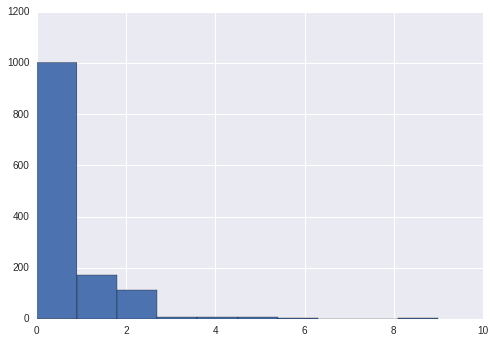

In [263]:
plt.hist(parch)

In [264]:
# the kids
original_data[original_data['sibsp'] == 8]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,total
1170,3,0,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,1
1171,3,0,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S,NaN,67.0,NaN,1
1172,3,0,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,1
1173,3,0,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,1
1174,3,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,1
1175,3,0,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,1
1176,3,0,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,1
1177,3,0,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,1
1178,3,0,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,1


In [265]:
original_data[original_data['parch'] == 9]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,total
1179,3,0,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,1
1180,3,0,"Sage, Mrs. John (Annie Bullen)",female,NaN,1,9,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,1


This are the children and the parents of the 'big' familly. Sadly all died :(

### ticket
the ticketnbr the passanger had

In [266]:
ticket = original_data['ticket']
len(ticket.unique())

939

In [267]:
ticket.dtype

dtype('O')

In [268]:
len(ticket[ticket.isnull()])

0

All (registered) passengers had a ticket ;)

### fare
How many they paid

In [269]:
fare = original_data['fare']
fare.mean()

33.29547928134572

In [270]:
fare.max()

512.32920000000001

In [271]:
fare.min()

0.0

There are people that did not pay anything

In [272]:
original_data[fare == 0]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,total
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S,NaN,NaN,"Belfast, NI",1
70,1,0,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0,NaN,S,NaN,NaN,"Liverpool, England / Belfast",1
125,1,0,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,B102,S,NaN,NaN,NaN,1
150,1,0,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,NaN,110.0,NaN,1
170,1,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0,B52 B54 B56,S,C,NaN,Liverpool,1
223,1,0,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,NaN,NaN,Belfast,1
234,1,0,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S,NaN,NaN,"Rotterdam, Netherlands",1
363,2,0,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,NaN,NaN,Belfast,1
384,2,0,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,NaN,NaN,Belfast,1
410,2,0,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,NaN,NaN,Belfast,1


In [273]:
fare.dtypes

dtype('float64')

In [274]:
original_data[fare.isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,total
1225,3,0,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,NaN,261.0,NaN,1


there is one NaN value

(array([ 1070.,   154.,    42.,     4.,    21.,    13.,     0.,     0.,
            0.,     4.]),
 array([   0.     ,   51.23292,  102.46584,  153.69876,  204.93168,
         256.1646 ,  307.39752,  358.63044,  409.86336,  461.09628,
         512.3292 ]),
 <a list of 10 Patch objects>)

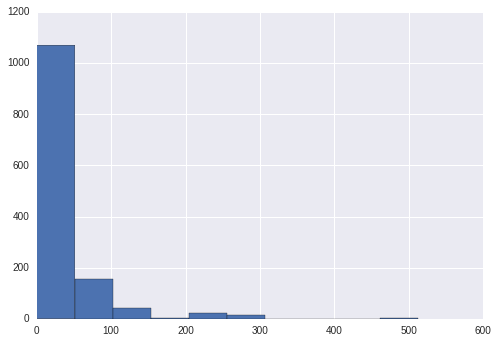

In [275]:
plt.hist(fare.dropna())

Someone got ripped of, or got the best room.

### cabin
What cabin they are in

In [276]:
cabin = original_data['cabin']
cabin.isnull().sum()

1014

1014 people have no cabin (all class 3?)

(array([  67.,    0.,    0.,    0.,    0.,  254.,    0.,    0.,    0.,  693.]),
 array([ 1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ]),
 <a list of 10 Patch objects>)

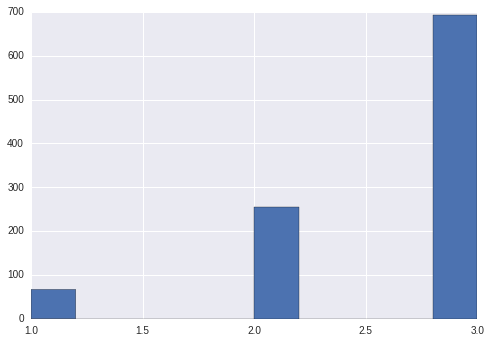

In [277]:
plt.hist(original_data[cabin.isnull()]['pclass'])

Even people in class 1 have no cabin (or it is unknown)

Some people have several cabines, but they are also occupied by several peoples, probablement families:

In [278]:
cabin.head()

0         B5
1    C22 C26
2    C22 C26
3    C22 C26
4    C22 C26
Name: cabin, dtype: object

### embarked


In [279]:
embarked = original_data['embarked']
embarked.unique()

array(['S', 'C', nan, 'Q'], dtype=object)

In [280]:
len(embarked[embarked.isnull()])

2

two people have NaN in 'embarked'

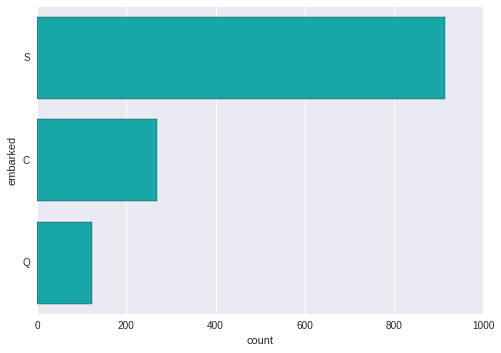

In [281]:
sns.countplot(y="embarked", data=original_data, color="c");

### boat
On what rescue-boat they were rescued

In [282]:
boat = original_data['boat']
boat.unique()

array([2, '11', nan, '3', '10', 'D', '4', '9', '6', 'B', '8', 'A', '5',
       '7', 'C', '14', '2', '5 9', '13', '1', '15', '5 7', '8 10', '12',
       '16', '13 15 B', 'C D', '15 16', '13 15'], dtype=object)

some have different boats.

### body
the identification number of a body

In [283]:
body = original_data['body']
body.count()

121

121 bodys got an number

### home dest

In [284]:
homedest = original_data['home.dest']
len(homedest.dropna().unique())

369

369 different home destinations
Lets find the most common one

In [285]:
original_data[['home.dest', 'total']].groupby(by='home.dest').sum().sort_values(by='total', ascending=False)

,total
home.dest,
"New York, NY",64
London,14
"Montreal, PQ",10
"Paris, France",9
"Cornwall / Akron, OH",9
"Wiltshire, England Niagara Falls, NY",8
"Winnipeg, MB",8
"Philadelphia, PA",8
Belfast,7


Most come from New York



## 2. Use the `groupby` method to calculate the proportion of passengers that survived by sex:

In [286]:
survived_by_sex = original_data[['survived', 'sex']].groupby('sex').sum()
nbr_males = len(original_data[original_data['sex'] == 'male'])
nbr_females = len(original_data[original_data['sex'] == 'female'])
nbr_total = len(original_data['sex'])

In [287]:
print(nbr_total == nbr_females + nbr_males) # to check if consistent

True


In [288]:
female_survived_percentage = (100/nbr_females) * survived_by_sex.at['female', 'survived']
male_survived_percentage = (100/nbr_males) * survived_by_sex.at['male', 'survived']
print('female surv: '+str(round(female_survived_percentage, 3))+'%')
print('male surv: '+str(round(male_survived_percentage, 3))+'%')

female surv: 72.747%
male surv: 19.098%


## 3. Calculate the same proportion, but by class and sex.

In [289]:

survived_by_class = original_data[['pclass', 'sex', 'survived', 'total']].groupby(['pclass', 'sex']).sum()
#TODO rename the 'ones' col to 'total nbr person'
survived_by_class


survived  total
pclass sex                    
1      female       139    144
       male          61    179
2      female        94    106
       male          25    171
3      female       106    216
       male          75    493

In [290]:
def combine_surv_total(row):
    #print(row)
    return 100.0/row.total * row.survived
survived_by_class

survived  total
pclass sex                    
1      female       139    144
       male          61    179
2      female        94    106
       male          25    171
3      female       106    216
       male          75    493

In [291]:
survived_by_class['survived in percent'] = survived_by_class.apply(combine_surv_total, axis=1)
survived_by_class

survived  total  survived in percent
pclass sex                                         
1      female       139    144            96.527778
       male          61    179            34.078212
2      female        94    106            88.679245
       male          25    171            14.619883
3      female       106    216            49.074074
       male          75    493            15.212982

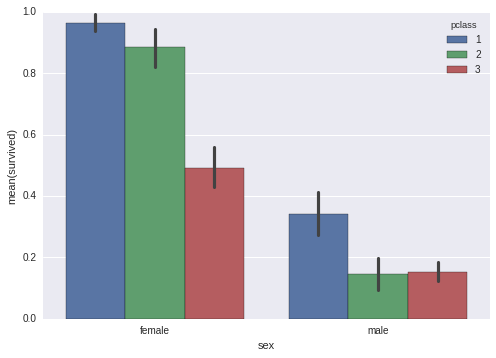

In [292]:
sns.barplot(x="sex", y="survived", hue="pclass", data=original_data);

We can see that 'women first' is true, but also 'class 1 first'

## 4. Create age categories: children (under 14 years), adolescents (14-20), adult (21-64), and senior(65+), and calculate survival proportions by age category, class and sex.